# Телеком — задача проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

## План проекта "Телеком"
**Задача:** на основеретроспективных данных построить модель, которая предскажет потенциально не лояльных абонентов телекоммуникационной компании

    Знакомство с  данными:
        .info();
        .describe();
        .value_counts().
    Преподготовка:
        Объединить  таблицы;
        Обработать  пропуски;
        Привести данные в надлежащие форматы;
        Создать новые фичи;
        Создать таргет;
        Отделить тестовую выборку.
    Исследовательский анализ:
        Построение графиков;
        Сравнение показателей у абонентов из оттока и действующих;
        
    Обучение моделей:
        Отделить таргет;
        Баланс классов делаем внутри моделей;
        Проверка кросс-валидацией;
             Модели:
                 DecisionTreeClassifier;
                 LogisticRegression;
                 CatBoostClassifier.
    
    Тестирование:
        Проверяем на тестовой ыборке лучшую модель.
    
    Выводы        
              
       
        
        


In [1]:
! pip install phik

     |████████████████████████████████| 679 kB 1.1 MB/s eta 0:00:01


In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import phik
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
import lightgbm as lgb
import warnings
from sklearn.metrics import roc_curve 
from sklearn.preprocessing import StandardScaler

In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

### Знакомство с  данными:

In [4]:
try:
    contract = pd.read_csv('/datasets/contract_new.csv')
    internet = pd.read_csv('/datasets/internet_new.csv')
    personal = pd.read_csv('/datasets/personal_new.csv')
    phone = pd.read_csv('/datasets/phone_new.csv')
except:    
    contract = pd.read_csv('C://Users/Владислав/Desktop/Новая папка/Data sceince/финальный проект/\contract_new.csv') 
    internet = pd.read_csv('C://Users/Владислав/Desktop/Новая папка/Data sceince/финальный проект/\internet_new.csv') 
    personal = pd.read_csv('C://Users/Владислав/Desktop/Новая папка/Data sceince/финальный проект/\personal_new.csv') 
    phone = pd.read_csv('C://Users/Владислав/Desktop/Новая папка/Data sceince/финальный проект/\phone_new.csv') 

In [5]:
file_name = [contract, internet, personal, phone]

In [6]:
for i in file_name:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-nu

In [7]:
for i in file_name:
    display(i.head(3))

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No


#### Описание датасетов
    contract
           customerID
           BeginDate
           EndDate
           Type
           PaperlessBilling
           PaymentMethod
           PaymentMethod
           MonthlyCharges
           TotalCharges
     internet
           customerID
           InternetService	
           OnlineSecurity	
           OnlineBackup	
           DeviceProtection	
           TechSupport	
           StreamingTV	
           StreamingMovies  
      personal
           customerID	
           gender	
           SeniorCitizen	
           Partner	
           Dependents
      phone
           customerID
           MultipleLines

проверим записи на уникальность

In [8]:
for i in file_name:
    display(len(i['customerID'].unique()))
    display(len(i))

7043

7043

5517

5517

7043

7043

6361

6361

In [9]:
phone[phone['customerID']=='3668-QPYBK']

,customerID,MultipleLines
1,3668-QPYBK,No


Представлены 4 табл, разной длины;   
Имеют общие поля customerID, пригодные для использования в кач-ве ключа;  
В каждой таблице все записи уникальны

### Преподготовка:

Объединим таблицы по полю customerID для дальнейшего рассмотрения

In [10]:
customers = contract.merge(internet, on = 'customerID', how = 'left')
customers = customers.merge(personal, on = 'customerID', how = 'left')
customers = customers.merge(phone, on = 'customerID', how = 'left')

customers.columns = map(str.lower, customers.columns)

display(customers.info())
display(customers.head(3))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   begindate         7043 non-null   object 
 2   enddate           7043 non-null   object 
 3   type              7043 non-null   object 
 4   paperlessbilling  7043 non-null   object 
 5   paymentmethod     7043 non-null   object 
 6   monthlycharges    7043 non-null   float64
 7   totalcharges      7043 non-null   object 
 8   internetservice   5517 non-null   object 
 9   onlinesecurity    5517 non-null   object 
 10  onlinebackup      5517 non-null   object 
 11  deviceprotection  5517 non-null   object 
 12  techsupport       5517 non-null   object 
 13  streamingtv       5517 non-null   object 
 14  streamingmovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  seniorcitizen     7043 non-null   int64  


None

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,gender,seniorcitizen,partner,dependents,multiplelines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No


В начальных данных небыло пропусков, но после объединения табл. они образоыались. Связано это с тем, что инфо об абонентах интернет и тлф присоединяли к полной базе данных клиентов. некоторые клиенты пользуются интернетом, но не пользуются тлф и наоборот. Заполним эти пропуски строками-заглушками

In [11]:
columns_to_replace = ['internetservice', 
                    'onlinesecurity', 
                    'onlinebackup', 
                    'deviceprotection', 
                    'techsupport', 
                    'streamingtv', 
                    'streamingmovies']
for i in columns_to_replace:
    customers[i] = customers[i].fillna('no_internet')
    
customers['multiplelines'] = customers['multiplelines'].fillna('no_phone')        

Приведем данные в соответтствующие форматы

In [12]:
customers['begindate'] = pd.to_datetime(customers['begindate'], format='%Y.%m.%d')
customers['totalcharges'] = pd.to_numeric(customers['totalcharges'], errors='coerce')

In [13]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           7043 non-null   object        
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7032 non-null   float64       
 8   internetservice   7043 non-null   object        
 9   onlinesecurity    7043 non-null   object        
 10  onlinebackup      7043 non-null   object        
 11  deviceprotection  7043 non-null   object        
 12  techsupport       7043 non-null   object        
 13  streamingtv       7043 non-null   object        
 14  streamingmovies   7043 n

Чтобы избежать учеки данных, begindate и enddate придется удалить. На их основе создадим столбец duration. Кроме того, на основе enddate создадим целевой признак 

Из условий нам известно, что выгрузка на 1 фев 2020г. Заменим No enddate на эту дату для расчета длительности использования абонентом услуг

In [14]:
customers['enddate'] = customers['enddate'].replace('No', '2020-02-01')
customers['enddate'] = pd.to_datetime(customers['enddate'], format='%Y.%m.%d')
customers['duration'] = customers['enddate']-customers['begindate']
customers['duration'] = customers['duration'].dt.days

После обратотки totalcharges образовалось 11 прокусков, "на скорость не влияет", поэтому сделаем вид, что не видели

In [15]:
customers['totalcharges'] = customers['totalcharges'].fillna(customers['monthlycharges']*customers['duration']/30)

In [16]:
def get_target(date):
    if date == pd.to_datetime('2020-02-01', format='%Y.%m.%d'):
        return 0
    else:
        return 1
    
        
customers['target'] = customers['enddate'].apply(get_target)

Продолжительность пользования и целефой признак сформированы. Даты удалим непосредственно перед обучением, т.к. они пригодятся в исследовательносм анализе.

### Исследовательский анализ:

In [17]:
display(customers['paymentmethod'].value_counts())
display(customers['type'].value_counts())
display(customers['internetservice'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: paymentmethod, dtype: int64

Month-to-month    3875
Two year          1695
One year          1473
Name: type, dtype: int64

Fiber optic    3096
DSL            2421
no_internet    1526
Name: internetservice, dtype: int64

Типичный представитель характеризуется эл. чеком, ежемесячным тарифом и оптикой. Посмотрим, как распределены разыне показатели по абонентам

In [18]:
customers.describe()

,monthlycharges,totalcharges,seniorcitizen,duration,target
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2115.312885,0.162147,898.555729,0.156325
std,30.090047,2112.742814,0.368612,683.130510,0.363189
min,18.250000,0.000000,0.000000,0.000000,0.000000
25%,35.500000,436.750000,0.000000,276.000000,0.000000
50%,70.350000,1343.350000,0.000000,761.000000,0.000000
75%,89.850000,3236.690000,0.000000,1461.000000,0.000000
max,118.750000,9221.380000,1.000000,2314.000000,1.000000


In [19]:
display((customers['gender'][customers['gender']=='Female'].count())/len(customers))
display((customers['target'][customers['target']==1].count())/len(customers))

0.495243504188556

0.15632542950447254

Из предоставленных данных следует, что 15% абонентов от всей базы покинули компанию, что по опыту является оч хорошим результатом. Гендеры, ожидаемо поделлись ровно пополам. Посмотрим на предпочтения пользователей в плане обслуживания и доп. услуг

In [20]:
bin_columns = ['paperlessbilling', 
               'onlinesecurity',
               'onlinebackup',
               'deviceprotection',
               'techsupport',
               'streamingtv',
               'streamingmovies',
               'partner',
               'dependents',
               'multiplelines']
for i in bin_columns:
    display(f'{i} {(customers[i][customers[i]=="Yes"].count())/len(customers)}')

'paperlessbilling 0.5922192247621753'

'onlinesecurity 0.2866676132329973'

'onlinebackup 0.3448814425670879'

'deviceprotection 0.3438875479199205'

'techsupport 0.2902172369728809'

'streamingtv 0.38435325855459324'

'streamingmovies 0.3879028822944768'

'partner 0.4830327985233565'

'dependents 0.2995882436461735'

'multiplelines 0.42183728524776376'

Здесь стоит отметить, что по популярности именно  стриминговые сервисы идут вслед за траиционной телефонией. Но и их догоняет onlinebackup.

Посмотрим разпределение количественных показателей

Text(0, 0.5, 'кол-во договоров')

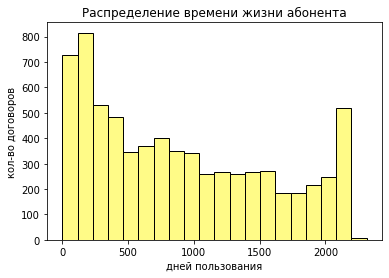

In [21]:
plt.hist(customers['duration'], color = '#fffa63c4', edgecolor = 'black',
         bins = 20)
plt.title('Распределение времени жизни абонента')
plt.xlabel('дней пользования')
plt.ylabel('кол-во договоров')

Text(0, 0.5, 'кол-во договоров')

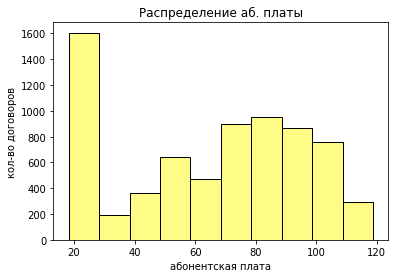

In [22]:
plt.hist(customers['monthlycharges'], color = '#fffa63c4', edgecolor = 'black',
         bins = 10)
plt.title('Распределение аб. платы')
plt.xlabel('абонентская плата')
plt.ylabel('кол-во договоров')

Text(0, 0.5, 'кол-во договоров')

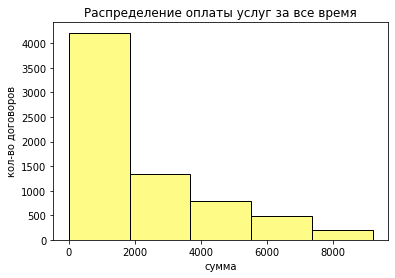

In [23]:
plt.hist(customers['totalcharges'], color = '#fffa63c4', edgecolor = 'black',
         bins = 5)
plt.title('Распределение оплаты услуг за все время')
plt.xlabel('сумма')
plt.ylabel('кол-во договоров')

Подавляющее большинство абонентов работают до 500 дней и платят оператору за время пользования до 2000 уе. Кроме того предпочтительны дешевые тарифы.

Посмотрим, отличаются ли распределения у абонентов, которые остались с оператором и у тех, кто отказался от услуг связи

In [24]:
current_customers = customers[customers['target']==0]
leaved_customers = customers[customers['target']==1]

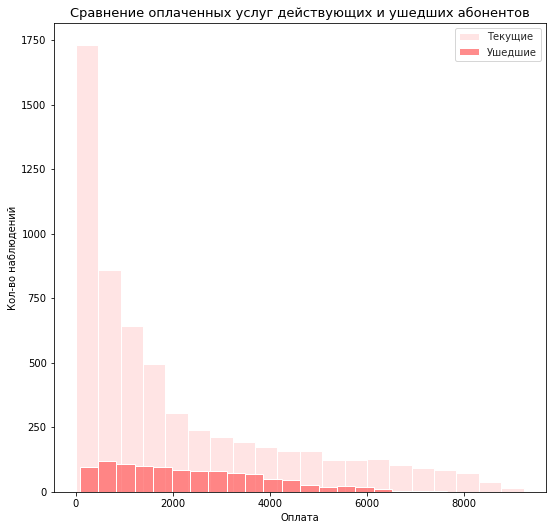

In [25]:
plt.figure(figsize=[30, 50])
plt.subplot(5, 3, 3)
plt.title('Сравнение оплаченных услуг действующих и ушедших абонентов', fontsize=13)
sb.set_style('whitegrid')
sb.histplot(current_customers['totalcharges'], color = '#ffdbdb', label='Текущие',bins = 20)
sb.histplot(leaved_customers['totalcharges'], color='#f66', label='Ушедшие',bins = 20)
plt.xlabel('Оплата')
plt.ylabel('Кол-во наблюдений')
plt.legend()
plt.show();

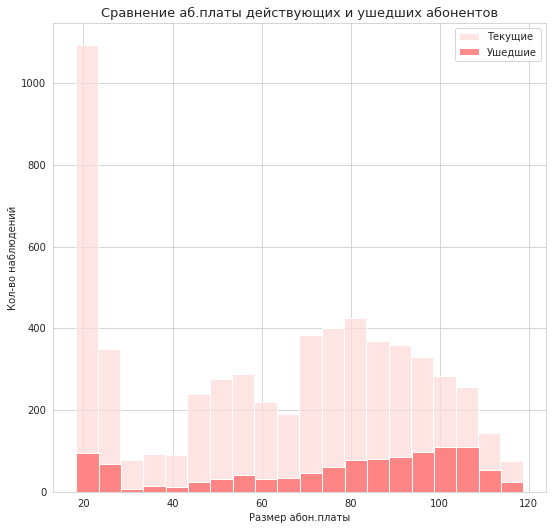

In [26]:
plt.figure(figsize=[30, 50])
plt.subplot(5, 3, 3)
plt.title('Сравнение аб.платы действующих и ушедших абонентов', fontsize=13)
sb.set_style('whitegrid')
sb.histplot(current_customers['monthlycharges'], color = '#ffdbdb', label='Текущие',bins = 20)
sb.histplot(leaved_customers['monthlycharges'], color='#f66', label='Ушедшие',bins = 20)
plt.xlabel('Размер абон.платы')
plt.ylabel('Кол-во наблюдений')
plt.legend()
plt.show();

Здесь важно отметить, что для обоих групп распределние имеет 2 пика, при чем, для ушедших абонентов воторой пик значительно смещен в сторону более дороших тарифов, относительно пика действующих абонентов. Такие абоненты могли уйти к конкурентам на значительно более выгодный тариф.

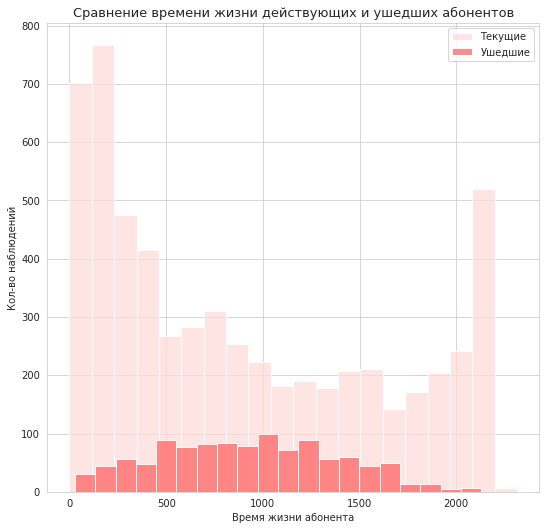

In [27]:
plt.figure(figsize=[30, 50])
plt.subplot(5, 3, 3)
plt.title('Сравнение времени жизни действующих и ушедших абонентов', fontsize=13)
sb.set_style('whitegrid')
sb.histplot(current_customers['duration'], color = '#ffdbdb', label='Текущие',bins = 20)
sb.histplot(leaved_customers['duration'], color='#f66', label='Ушедшие',bins = 20)
plt.xlabel('Время жизни абонента')
plt.ylabel('Кол-во наблюдений')
plt.legend()
plt.show();

Распределние длительности польpования услуг у ушедших абонентов близко к нормальному, в отличии от действующих.

Посмотрим прочие предпочтения для 2_х групп

In [28]:
current_bin_param = []
leaved_bin_param = []

for i in bin_columns:
    current_bin_param.append(current_customers[i][current_customers[i]=="Yes"].count()/len(current_customers))
    leaved_bin_param.append(leaved_customers[i][leaved_customers[i]=="Yes"].count()/len(leaved_customers))

summary_tables = pd.DataFrame(bin_columns,columns =['param'])
summary_tables['current'] = current_bin_param
summary_tables['leaved'] = leaved_bin_param
summary_tables

,param,current,leaved
0,paperlessbilling,0.580613,0.654859
1,onlinesecurity,0.269943,0.376930
2,onlinebackup,0.314541,0.508629
3,deviceprotection,0.315045,0.499546
4,techsupport,0.277011,0.361490
5,streamingtv,0.357287,0.530427
6,streamingmovies,0.357792,0.550409
7,partner,0.451531,0.653043
8,dependents,0.293167,0.334242
9,multiplelines,0.385897,0.615804


У среди ушедших абонентов популярность доп.сервисов больше, чем у действующих. Этим можно было бы объяснить смещение ежемесячной платы в сторону увеличения для ушедгших абонентов, но т.к. у ушедших выше в т.ч. и параметры dependents и partner, то подобное завышение можно объяснить критически малой нерепрезентативной выборкой для ушедших. С другой стороны как 1101 записей могут быть не репрезентативными...

Посмотрим на корреляцию элементов при помощи коэффициента Phik.

In [29]:
df_for_corr = customers.drop(['customerid','target'], axis=1)
phik_overview = df_for_corr.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['monthlycharges', 'totalcharges', 'seniorcitizen', 'duration']


,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,gender,seniorcitizen,partner,dependents,multiplelines,duration
begindate,1.00,0.55,0.77,0.08,0.46,0.42,0.77,0.19,0.46,0.50,0.50,0.46,0.42,0.43,0.01,0.05,0.47,0.21,0.47,0.98
enddate,0.55,1.00,0.29,0.06,0.17,0.17,0.22,0.12,0.17,0.24,0.23,0.15,0.19,0.20,0.02,0.09,0.18,0.06,0.25,0.40
type,0.77,0.29,1.00,0.11,0.28,0.39,0.47,0.51,0.64,0.58,0.63,0.67,0.55,0.55,0.00,0.09,0.18,0.15,0.24,0.63
paperlessbilling,0.08,0.06,0.11,1.00,0.37,0.47,0.20,0.23,0.21,0.20,0.20,0.20,0.20,0.20,0.00,0.24,0.01,0.17,0.10,0.03
paymentmethod,0.46,0.17,0.28,0.37,1.00,0.40,0.34,0.32,0.32,0.29,0.30,0.32,0.28,0.29,0.00,0.29,0.24,0.22,0.17,0.35
monthlycharges,0.42,0.17,0.39,0.47,0.40,1.00,0.71,0.92,0.81,0.82,0.83,0.82,0.86,0.86,0.01,0.30,0.20,0.18,0.71,0.39
totalcharges,0.77,0.22,0.47,0.20,0.34,0.71,1.00,0.49,0.52,0.55,0.56,0.53,0.56,0.55,0.00,0.14,0.38,0.08,0.47,0.85
internetservice,0.19,0.12,0.51,0.23,0.32,0.92,0.49,1.00,0.95,0.94,0.94,0.95,0.95,0.95,0.00,0.16,0.00,0.11,0.74,0.06
onlinesecurity,0.46,0.17,0.64,0.21,0.32,0.81,0.52,0.95,1.00,0.95,0.95,0.95,0.94,0.94,0.00,0.13,0.09,0.12,0.54,0.35
onlinebackup,0.50,0.24,0.58,0.20,0.29,0.82,0.55,0.94,0.95,1.00,0.95,0.95,0.95,0.95,0.00,0.11,0.09,0.10,0.56,0.37


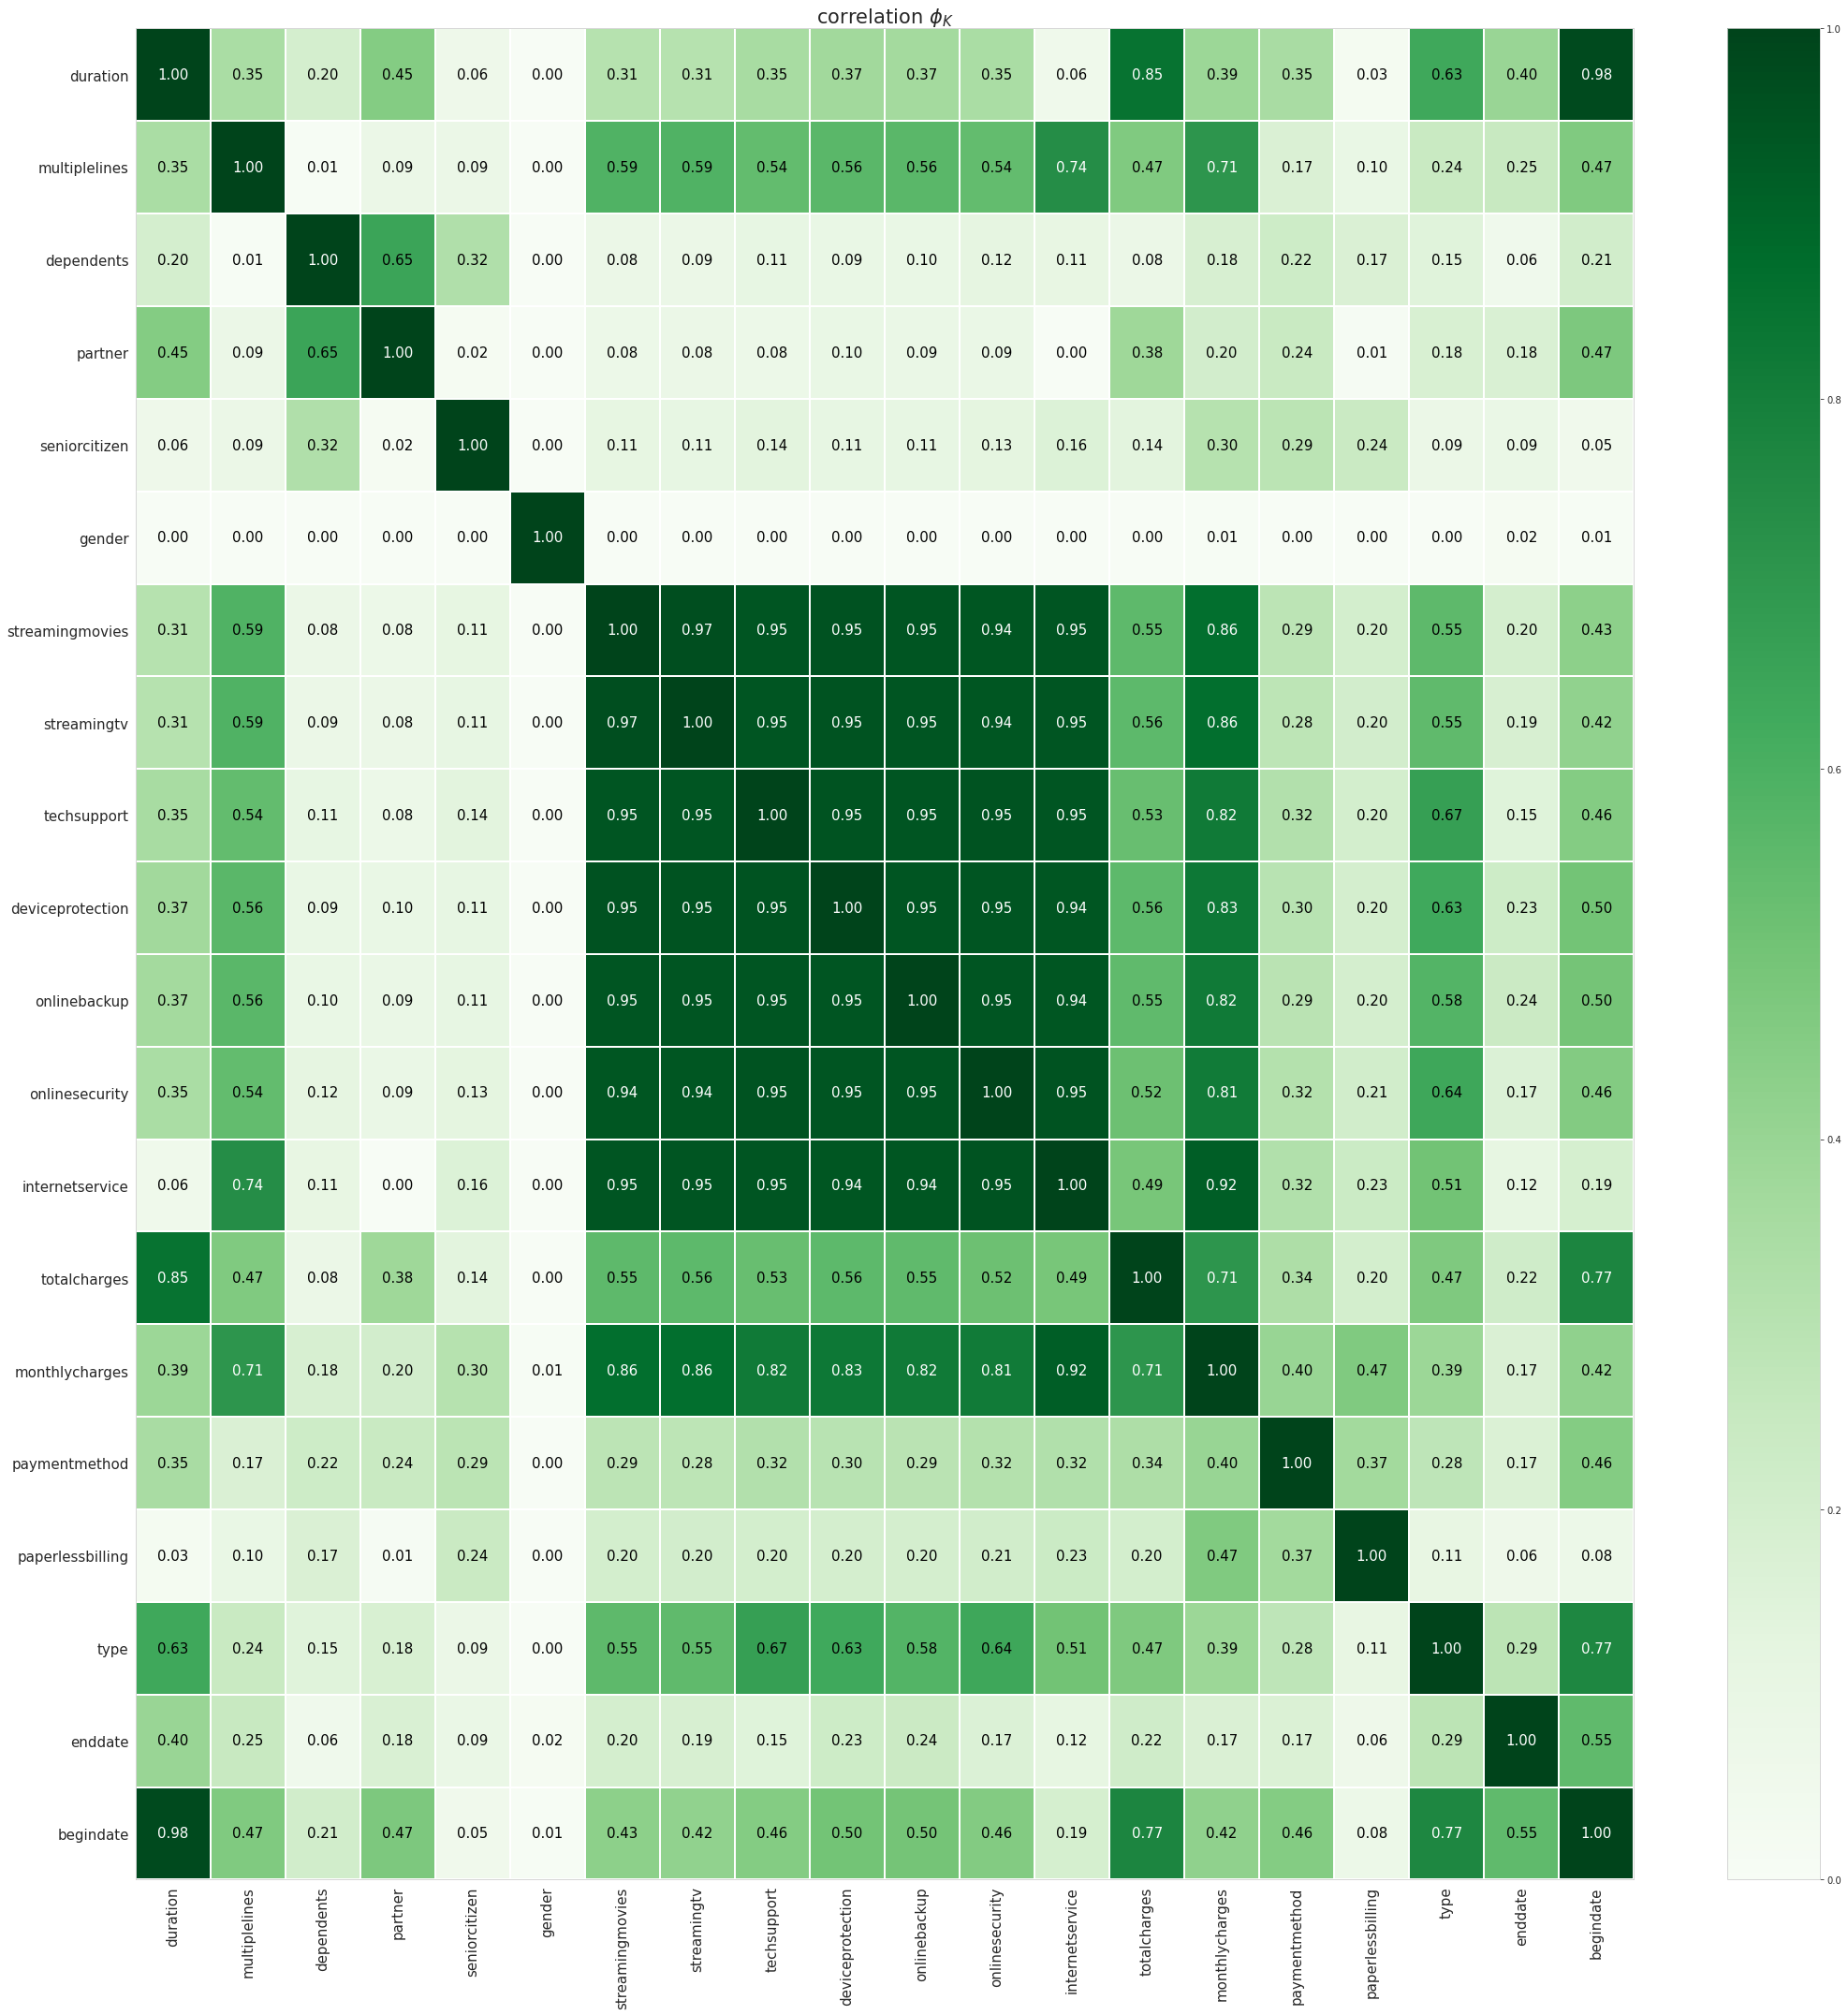

In [30]:

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(30, 30))
plt.tight_layout()

Из интересного моно выделить взаимосвязь:  

        типа подключения и доп. сервисов
        тип и дата начала пользования/продролжительность (может частично объяснять форму гистограммы длительности использования. Возможно, была какая-то модернизация сети, повлиявшая на качество)
        
Отметим выявленные, но менее интересные взаимосвязи:  

    продолжительность пользования и общая выручка;
    ежемесячная оплата и дом. сервисы;
    обзая выручка и ежемес. тариф;
    дата начала пользования и продолжительность
    

#### Выводы по исследоваельскому анализу:

Большинство аб предпочитают дешевые тарифы;   
Среди ушедших абонентов популярность доп.сервисов больше, чем у действующих (предположительно);   
График плотности расперделения длительности пользования отличается от нормального;   
В представленных данных прослеживаются некоторые различия в моделях поведения действующиз абонентов и ушедших. 

### Обучение моделей:

#### Подготовка к обучению:

In [31]:
target = customers['target']
features = customers.drop(['target','begindate', 'enddate','customerid'], axis=1)

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.25, random_state=100423 )

In [32]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              7043 non-null   object 
 1   paperlessbilling  7043 non-null   object 
 2   paymentmethod     7043 non-null   object 
 3   monthlycharges    7043 non-null   float64
 4   totalcharges      7043 non-null   float64
 5   internetservice   7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  gender            7043 non-null   object 
 13  seniorcitizen     7043 non-null   int64  
 14  partner           7043 non-null   object 
 15  dependents        7043 non-null   object 
 16  multiplelines     7043 non-null   object 


Применим кодирование категориальныхданных OHE

In [33]:
features_train_ohe = pd.get_dummies(features_train, drop_first=True)
features_test_ohe = pd.get_dummies(features_test, drop_first=True)

display(features_train_ohe.info())
display(features_test_ohe.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 1704 to 1879
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   monthlycharges                         5282 non-null   float64
 1   totalcharges                           5282 non-null   float64
 2   seniorcitizen                          5282 non-null   int64  
 3   duration                               5282 non-null   int64  
 4   type_One year                          5282 non-null   uint8  
 5   type_Two year                          5282 non-null   uint8  
 6   paperlessbilling_Yes                   5282 non-null   uint8  
 7   paymentmethod_Credit card (automatic)  5282 non-null   uint8  
 8   paymentmethod_Electronic check         5282 non-null   uint8  
 9   paymentmethod_Mailed check             5282 non-null   uint8  
 10  internetservice_Fiber optic            5282 non-null   uint8  
 11  i

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 4412 to 3652
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   monthlycharges                         1761 non-null   float64
 1   totalcharges                           1761 non-null   float64
 2   seniorcitizen                          1761 non-null   int64  
 3   duration                               1761 non-null   int64  
 4   type_One year                          1761 non-null   uint8  
 5   type_Two year                          1761 non-null   uint8  
 6   paperlessbilling_Yes                   1761 non-null   uint8  
 7   paymentmethod_Credit card (automatic)  1761 non-null   uint8  
 8   paymentmethod_Electronic check         1761 non-null   uint8  
 9   paymentmethod_Mailed check             1761 non-null   uint8  
 10  internetservice_Fiber optic            1761 non-null   uint8  
 11  i

None

In [34]:
features_train_ohe.columns == features_test_ohe.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

#### DecisionTreeClassifier

In [35]:
%%time
model_dt = DecisionTreeClassifier(random_state = 100423, criterion='entropy')

rs_space = {
    
    'max_depth': np.arange(1, 50, step=5)
}

randsearch = RandomizedSearchCV(model_dt, rs_space, n_iter=100, n_jobs=-1, cv=3, scoring='roc_auc')
model_randsearch = randsearch.fit(features_train_ohe, target_train)

print ("Best Params", model_randsearch.best_params_)
print ("Best Score", model_randsearch.best_score_)
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Params {'max_depth': 6}
Best Score 0.780719220845556
CPU times: user 823 ms, sys: 7.45 ms, total: 830 ms
Wall time: 864 ms


#### LogisticRegression

Выполним масштабирование числовых признаков

In [36]:

scaler = StandardScaler()
scaler.fit(features_train_ohe[['monthlycharges','totalcharges','duration']]) 
features_train_scaled = scaler.transform(features_train_ohe[['monthlycharges','totalcharges','duration']])

In [37]:
%%time
model_lr = LogisticRegression(random_state=100423,class_weight='balanced', solver='lbfgs') 

g_space_lr = { 
              'max_iter': range (100,300,10),      
              'C':list(range(7,22,3)),
#              'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
              }

grid_lr = GridSearchCV(model_lr, g_space_lr, cv=3, scoring='roc_auc').fit(features_train_scaled, target_train)

print ("Best Params", grid_lr.best_params_)
print ("Best Score", grid_lr.best_score_)

Best Params {'C': 7, 'max_iter': 100}
Best Score 0.6465460605490563
CPU times: user 14.3 s, sys: 40 s, total: 54.3 s
Wall time: 54.4 s


#### CatBoostClassifier

In [38]:
model_cbc = CatBoostClassifier(
    custom_metric = 'AUC',
    random_state=100423
    
    )

g_space_cbc = { 
              'depth': range (1,10,1),      
              'n_estimators':range (1,30,3),
              'loss_function':['Logloss', 'MAE', 'CrossEntropy']
              }

grid_cbc = GridSearchCV(model_cbc, g_space_cbc, cv=3, scoring='roc_auc').fit(features_train_ohe, target_train)

#cross_val_score(model_cbc, features_train_ohe, target_train, scoring='roc_auc').mean()
print ("Best Score", grid_cbc.best_score_)
print ("Best Params", grid_cbc.best_params_)


Learning rate set to 0.5
0:	learn: 0.4908223	total: 47.1ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4813520	total: 660us	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4882095	total: 902us	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4908223	total: 1.08ms	remaining: 3.25ms
1:	learn: 0.4372404	total: 2.13ms	remaining: 2.13ms
2:	learn: 0.4099931	total: 3.09ms	remaining: 1.03ms
3:	learn: 0.3933011	total: 4.13ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4813520	total: 741us	remaining: 2.23ms
1:	learn: 0.4340562	total: 1.43ms	remaining: 1.43ms
2:	learn: 0.4081636	total: 2.08ms	remaining: 694us
3:	learn: 0.3924772	total: 2.99ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4882095	total: 1.05ms	remaining: 3.16ms
1:	learn: 0.4315783	total: 2.08ms	remaining: 2.08ms
2:	learn: 0.4068914	total: 3.09ms	remaining: 1.03ms
3:	learn: 0.3934221	total: 3.96ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4908223	total: 940us	remaining: 5.64ms
1:	learn: 0.4372

#### LGBMClassifier

In [ ]:
#cat_features = 
model_lgb = lgb.LGBMClassifier(objective="binary", random_state=100423)
g_space_cbc = {  
              'n_estimators':range (1,100,3),
                'max_depth':range (1,30,3)
              }

grid_lgb = GridSearchCV(model_lgb, g_space_cbc, cv=3, scoring='roc_auc').fit(features_train_ohe, target_train)

print ("Best Score", grid_lgb.best_score_)
print ("Best Params", grid_lgb.best_params_)

Лучшей моделью показал себя LGBMClassifier с параметрами 'max_depth': 19, 'n_estimators': 97. Проведем ее проверку на тестовой выборке 

### Тестирование лучшей модели

In [ ]:
probabilities_valid = grid_lgb.predict_proba(features_test_ohe)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid) 

plt.figure()
plt.plot(fpr,tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show()
auc_roc = roc_auc_score(target_test ,probabilities_one_valid)
auc_roc

In [ ]:
importances = grid_lgb.best_estimator_.feature_importances_

# Создаем отдельный датасет для визуализации
final_df = pd.DataFrame({"Features" : pd.DataFrame(features_train_ohe).columns, "Importances" : importances})
final_df.set_index('Importances')

# Сортируем их по возрастанию для лучшей визуализации
final_df = final_df.sort_values('Importances')
final_df

### Выводы по обучению моделей:

В ходе потроения моделей было испытано 4 модели: 

LogisticRegression  
DecisionTreeClassifier  
CatBoostClassifier  
LGBMClassifier  

Через GridSearch подобраны различные гиперпараметры.Лучше всего себя проявила модель LGBMClassifier с параметрами 'max_depth': 19, 'n_estimators': 97. Ее испытали на заранее отделенной тестовой выбоке. Метрика ROC_AUC на тесте составила 0.88, что удовлетворяет условиям задачи.